In [27]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [28]:
x_train = x_train.reshape(-1,28,28)/255.
x_test = x_test.reshape(-1,28,28)/255.
y_train = utils.to_categorical(y_train, num_classes = 10)
y_test = utils.to_categorical(y_test, num_classes=10)

In [32]:
model = Sequential()
model.add(SimpleRNN(units = 64, batch_input_shape = (None, 28, 28), unroll = True))
model.add(Dense(units = 10, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
train_history = model.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_split = 0.2,verbose = True)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 64)                5952      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 6,602
Trainable params: 6,602
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
750/750 [==============================] - 5s 7ms/step - loss: 0.7189 - accuracy: 0.7739 - val_loss: 0.3993 - val_accuracy: 0.8813
Epoch 2/10
750/750 [==============================] - 5s 6ms/step - loss: 0.3250 - accuracy: 0.9045 - val_loss: 0.2687 - val_accuracy: 0.9227
Epoch 3/10
750/750 [==============================] - 5s 6ms/step - loss: 0.2574 - accuracy: 0.9245 - val_loss: 0.2111 - val_accuracy: 0.9377
Epoch 4/10
750/750 [==============================] - 5s 6ms/step - loss: 0.2167 - accur

In [33]:
acc = model.evaluate(x_test,y_test, verbose = 0)[1]
acc

0.9571999907493591

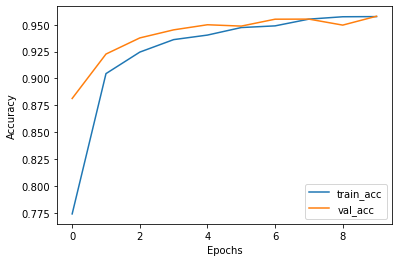

In [34]:
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], label = 'train_acc')
plt.plot(train_history.history['val_accuracy'], label = 'val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()